# Polynomial Regression: Predicting CO2 Emissions
This notebook demonstrates how to implement **Polynomial Regression** using Scikit-Learn.

## About the Author
This notebook was created by **Aimal Khan**.

### Step 1: Import Required Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load Dataset

In [ ]:
# Load dataset
file_path = '../datasets/CO2-emissions.csv'  # Update with correct path
df = pd.read_csv(file_path)

🔹 First 5 rows of the dataset:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                           

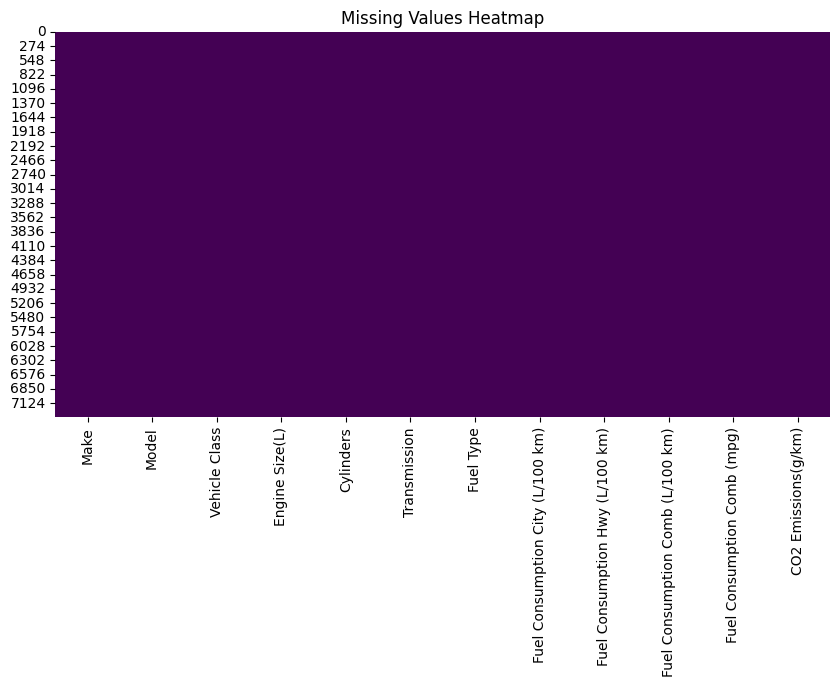

In [55]:
# 1️⃣ Display first and last rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Last 5 rows of the dataset:")
print(df.tail())

# 2️⃣ Get dataset summary
print("\n🔹 Dataset Information:")
print(df.info())

# 3️⃣ Get basic statistics (numerical features)
print("\n🔹 Statistical Summary:")
print(df.describe())

# 4️⃣ Check for missing values
print("\n🔹 Missing Values in Dataset:")
print(df.isnull().sum())

# 5️⃣ Check for duplicate rows
print("\n🔹 Number of Duplicate Rows:")
print(df.duplicated().sum())

# 6️⃣ Get column names and data types
print("\n🔹 Column Names and Data Types:")
print(df.dtypes)

# 7️⃣ Count unique values in each column
print("\n🔹 Unique Value Counts:")
print(df.nunique())

# 8️⃣ Check correlation between numerical features
print("\n🔹 Feature Correlation Matrix:")
# print(df.corr())

# 9️⃣ Get value counts for categorical columns (replace 'Column_Name' with actual categorical column)
categorical_columns = ['Make', 'Model', 'Vehicle Class', 'Fuel Type']  # Adjust based on your dataset
for col in categorical_columns:
    print(f"\n🔹 Value Counts for {col}:")
    print(df[col].value_counts())

# 1️⃣0️⃣ Visualizing Missing Values (if any)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [59]:
# 1️⃣ Remove Duplicate Rows
df = df.drop_duplicates()

# 2️⃣ Rename Columns: Convert to lowercase, replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 3️⃣ Handle Missing Values (If any)
df = df.dropna()  # Remove rows with missing values (or use df.fillna(value) for imputation)

# 4️⃣ Convert Categorical Columns to Lowercase (If applicable)
categorical_columns = ['make', 'model', 'vehicle_class', 'fuel_type']  # Adjust based on your dataset
for col in categorical_columns:
    df[col] = df[col].astype(str).str.lower()

# 5️⃣ Convert Numerical Data Types (If required)
numerical_columns = ['engine_size(l)', 'cylinders', 'fuel_consumption_comb_(l/100_km)', 'co2_emissions(g/km)']  # Adjust based on dataset
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# 6️⃣ Reset Index after cleaning
df = df.reset_index(drop=True)

# 7️⃣ Verify Data After Preprocessing
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              5991 non-null   object 
 1   model                             5991 non-null   object 
 2   vehicle_class                     5991 non-null   object 
 3   engine_size(l)                    5991 non-null   float64
 4   cylinders                         5991 non-null   int64  
 5   transmission                      5991 non-null   object 
 6   fuel_type                         5991 non-null   object 
 7   fuel_consumption_city_(l/100_km)  5991 non-null   float64
 8   fuel_consumption_hwy_(l/100_km)   5991 non-null   float64
 9   fuel_consumption_comb_(l/100_km)  5991 non-null   float64
 10  fuel_consumption_comb_(mpg)       5991 non-null   int64  
 11  co2_emissions(g/km)               5991 non-null   int64  
dtypes: flo

(None,
     make       model vehicle_class  engine_size(l)  cylinders transmission  \
 0  acura         ilx       compact             2.0          4          AS5   
 1  acura         ilx       compact             2.4          4           M6   
 2  acura  ilx hybrid       compact             1.5          4          AV7   
 3  acura     mdx 4wd   suv - small             3.5          6          AS6   
 4  acura     rdx awd   suv - small             3.5          6          AS6   
 
   fuel_type  fuel_consumption_city_(l/100_km)  \
 0         z                               9.9   
 1         z                              11.2   
 2         z                               6.0   
 3         z                              12.7   
 4         z                              12.1   
 
    fuel_consumption_hwy_(l/100_km)  fuel_consumption_comb_(l/100_km)  \
 0                              6.7                               8.5   
 1                              7.7                               9.6

### Step 3: Select Features and Target Variable

In [60]:
# Select independent variable (feature)
feature_names = ['engine_size(l)', 'cylinders', 'fuel_consumption_comb_(l/100_km)']
X = df[feature_names].values

# Select dependent variable (target)
Y = df[['co2_emissions(g/km)']].values

### Step 4: Split Data into Training and Testing Sets
We split the dataset into:

- 80% Training Data
- 20% Testing Data

In [61]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Step 5: Transform Data for Polynomial Regression
We convert our feature $𝑋$ into polynomial features of degree $𝑛$

In [62]:
# Define polynomial degree
degree = 4  # Try different degrees (2, 3, etc.)

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Display transformed feature matrix
print(f'Original Feature Shape: {X_train.shape}')
print(f'Transformed Feature Shape: {X_train_poly.shape}')

Original Feature Shape: (4792, 3)
Transformed Feature Shape: (4792, 34)


### Step 6: Train the Polynomial Regression Model

In [63]:
# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Print coefficients
print(f'Intercept (b0): {model.intercept_[0]:.4f}')
print(f'Coefficients (b1, b2, ...): {model.coef_[0]}')

Intercept (b0): 36.0972
Coefficients (b1, b2, ...): [-1.26801904e+02  1.03060702e+02 -1.81258373e+01  6.44664494e+01
 -5.34150031e+01  2.20285640e+01  1.95204424e+01 -3.28210628e+01
  1.26725580e+01  2.49058063e+01 -6.78590566e+01  1.56778383e+00
  6.79107145e+01 -2.51457758e+01  5.43407173e+00 -1.91226641e+01
  8.61471397e+00  1.43984444e+00 -1.59201894e+00 -7.18391651e+00
  1.86482515e+01 -2.48910046e+00 -1.24804916e+01 -6.52884341e-01
  1.70199123e+00  1.40695482e+00  2.17665617e+00 -4.62773636e-01
 -4.34610233e-01  5.56129120e-01 -7.10628320e-01  4.42027795e-03
  4.07700275e-02  5.59579357e-02]


### Step 7: Make Predictions

In [64]:
# Predict CO2 emissions on test data
Y_pred = model.predict(X_test_poly)

### Step 8: Evaluate Model Performance
We evaluate using:

- Mean Squared Error (MSE)
- $R^2$ Score (Coefficient of Determination)

In [65]:
# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate R-squared Score
r2 = r2_score(Y_test, Y_pred)

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-Squared Score (R²): {r2:.4f}')

Mean Squared Error (MSE): 236.02
R-Squared Score (R²): 0.9352


### Step 9: Visualizing Polynomial Regression Curve

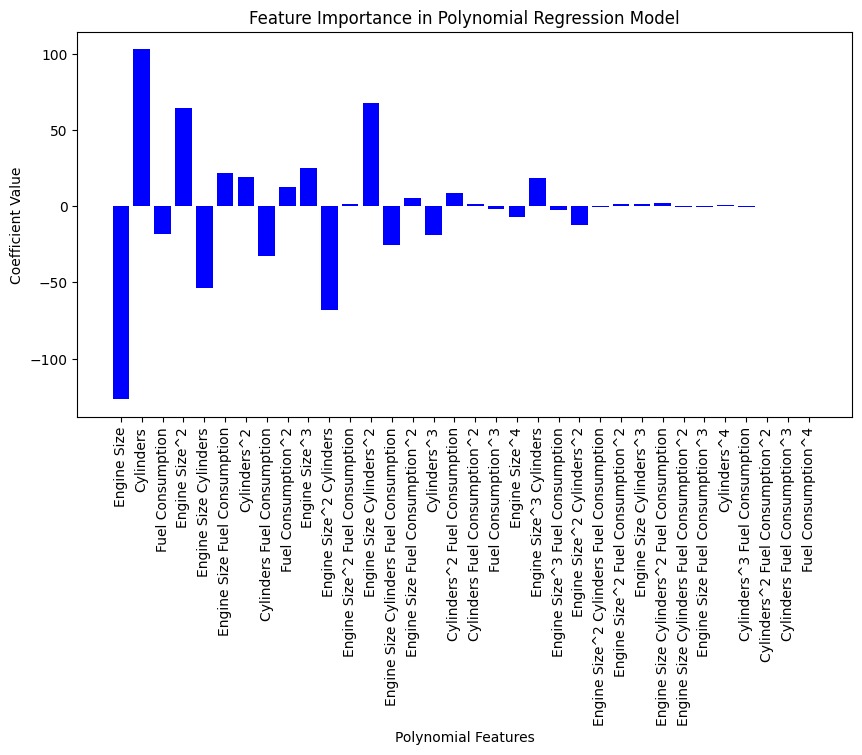

In [66]:
# Get feature names after polynomial transformation
feature_names = poly.get_feature_names_out(['Engine Size', 'Cylinders', 'Fuel Consumption'])

# Get model coefficients
coefficients = model.coef_[0]

# Plot feature importance
plt.figure(figsize=(10,5))
plt.bar(feature_names, coefficients, color='blue')
plt.xticks(rotation=90)
plt.xlabel("Polynomial Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Polynomial Regression Model")
plt.show()
